# Parametri DBSCAN

Cerchiamo di capire meglio come utilizzare i parametri

## DBSCAN and Clustering Examples

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
two_blobs = pd.read_csv('https://raw.githubusercontent.com/pg-88/IFOA_ML_AI/main/Risorse/dataset/cluster-two-blobs.csv')
two_blobs_outliers = pd.read_csv('https://raw.githubusercontent.com/pg-88/IFOA_ML_AI/main/Risorse/dataset/cluster-two-blobs-outliers.csv')

In [7]:
# grafici

## Ricerca delle Label

In [6]:
def display_categories(model,data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data,x='X1',y='X2',hue=labels,palette='Set1')

## DBSCAN

In [8]:
from sklearn.cluster import DBSCAN

In [9]:
help(DBSCAN)

Help on class DBSCAN in module sklearn.cluster._dbscan:

class DBSCAN(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
 |  
 |  Perform DBSCAN clustering from vector array or distance matrix.
 |  
 |  DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
 |  Finds core samples of high density and expands clusters from them.
 |  Good for data which contains clusters of similar density.
 |  
 |  Read more in the :ref:`User Guide <dbscan>`.
 |  
 |  Parameters
 |  ----------
 |  eps : float, default=0.5
 |      The maximum distance between two samples for one to be considered
 |      as in the neighborhood of the other. This is not a maximum bound
 |      on the distances of points within a cluster. This is the most
 |      important DBSCAN parameter to choose appropriately for your data set
 |      and distance function.
 |  
 |  min_sam

In [10]:
dbscan = DBSCAN()

In [11]:
display_categories(dbscan,two_blobs)

In [12]:
display_categories(dbscan,two_blobs_outliers)

# Epsilon

    eps : float, default=0.5
     |      The maximum distance between two samples for one to be considered
     |      as in the neighborhood of the other. This is not a maximum bound
     |      on the distances of points within a cluster. This is the most
     |      important DBSCAN parameter to choose appropriately for your data set
     |      and distance function.

**Epsilon**: Piccola epsilon = piccolo raggio per i punti => tutto diventa outlier

In [13]:
display_categories(dbscan,two_blobs_outliers)

Grande epsilon = grande raggio => tutto nello stesso cluster

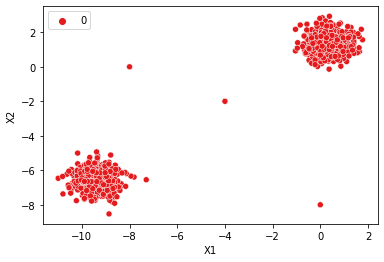

In [82]:
# dbscan =
# display_categories(dbscan,two_blobs_outliers)

### Quale valore scegliere di **Epsilon**?

In [14]:

plt.figure(figsize=(10,6),dpi=200)
dbscan = DBSCAN(eps=1)
display_categories(dbscan,two_blobs_outliers)

<Figure size 2000x1200 with 0 Axes>

### Numero di punti esterni (**outliers**)

Quanti punti esterni ai cluster abbiamo trovato? 

Il risultato è in linea con le aspettative?

Per capire se il modello ha lavorato bene, partiamo col calcolare quanti outliers sono stati trovati in relazione al numero di punti che abbiamo.

## Valori di epsilon in funzione degli outliers

un altro approccio poteva essere quello di considerare il numero di cluster generati con l'attributo `labels_`

In [189]:
outlier_percent = []
number_of_outliers = []

# ciclo per generare modelli con valori diversi di epsilon

In [22]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_percent)
plt.ylabel("Percentuale di Punti Outliers Sul Totale")
plt.xlabel("Epsilon")

NameError: name 'outlier_percent' is not defined

(0.0, 1.0)

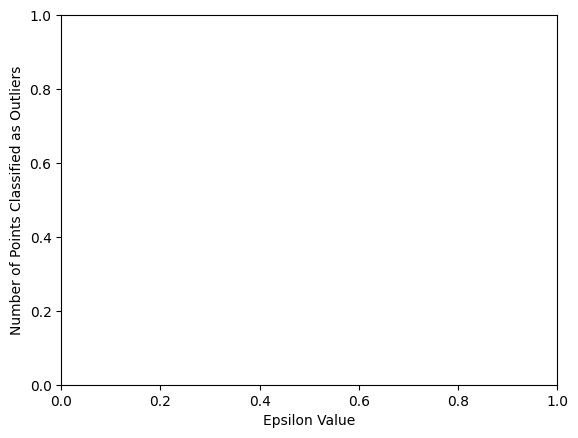

In [18]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outliers)
plt.ylabel("Numero di Outliers")
plt.xlabel("Epsilon")
plt.xlim(0,1)

### Ragioniamo in termini di percentuale


In [23]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_percent)
plt.ylabel("Percentuale di Punti Outliers Sul Totale")
plt.xlabel("Epsilon")
plt.ylim(0,5)
plt.xlim(0,2)
plt.hlines(y=1,xmin=0,xmax=2,colors='red',ls='--')

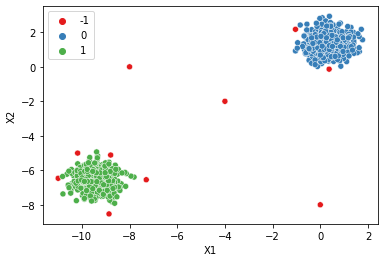

In [194]:
dbscan = DBSCAN(eps=0.4)
display_categories(dbscan,two_blobs_outliers)

### Oppure in termini di numero di outliers

Ad esempio fissiamo il limite a 3 punti

In [24]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outliers)
plt.ylabel("Numero di outliers")
plt.xlabel("Epsilon Value")
plt.ylim(0,10)
plt.xlim(0,6)
plt.hlines(y=3,xmin=0,xmax=10,colors='red',ls='--')

## Scelta di Epsilon

Possiamo ora scegliere con congnizione di causa il valore di **epsilon**

In [25]:
# dbscan = 
# display_categories(dbscan,two_blobs_outliers)

## Numero di punti 

     |  min_samples : int, default=5
     |      The number of samples (or total weight) in a neighborhood for a point
     |      to be considered as a core point. This includes the point itself.

Possiamo ragionare in maniera simile


In [218]:
outlier_percent = []

# ciclo per i valori di n
# ricordiamo che n è intero
    

In [26]:
sns.lineplot(x=np.arange(1,100),y=outlier_percent)


### Prima approsimazione

Un buon valore per partire con il numero di valori è il doppio del numero di dimensioni del dataset

In [27]:
num_dim = two_blobs_outliers.shape[1]

dbscan = DBSCAN(min_samples=2*num_dim)
display_categories(dbscan,two_blobs_outliers)

In [28]:
num_dim = two_blobs_outliers.shape[1]

dbscan = DBSCAN(eps=0.75,min_samples=2*num_dim)
display_categories(dbscan,two_blobs_outliers)

In [29]:
dbscan = DBSCAN(min_samples=1)
display_categories(dbscan,two_blobs_outliers)

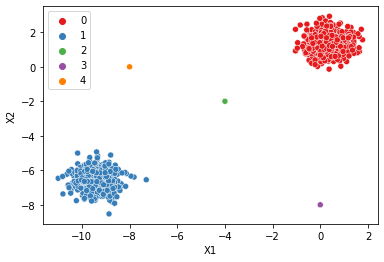

In [232]:
dbscan = DBSCAN(eps=0.75,min_samples=1)
display_categories(dbscan,two_blobs_outliers)

----